# Homework #4 - Ravi Raghavan

In [140]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt

## Vanilla Gradient Descent

In [141]:
#Run Vanilla Gradient Descent Algorithm
#f: function
#gradient: function that computes gradient of f at particular point
#x0: initial starting point
#alpha: fixed step size
#max_iter: maximum number of iterations to run
#epislon: converge criterion for function value
def vanilla_gradient_descent(f, gradient, x0: np.ndarray, alpha, max_iter, epsilon):
    x = x0
    fx = f(x)
    
    print(f"Initial Function Value: {fx}")
    function_values = []
    function_values.append(fx)
    points = np.array([x])
    
    for iter in range(max_iter):
        x = x - alpha * gradient(x)
        points = np.append(points, x[np.newaxis, :, :], axis=0)
        
        print(f"Updated Function Value: {f(x)}")
        
        if np.abs(f(x) - fx) <= epsilon:
            break
        
        fx = f(x)
        function_values.append(fx)
    
    function_values = np.array(function_values)
    return points, function_values

## Exact Line Search

In [142]:
def exact_line_search_gradient_descent(f, gradient, exact_line_search, x0: np.ndarray, max_iter, epsilon):
    x = x0
    fx = f(x)
    
    print(f"Initial Function Value: {fx}")
    function_values = []
    function_values.append(fx)
    points = np.array([x])
    
    for iter in range(max_iter):
        grad = gradient(x)
        alpha = exact_line_search(x, -1 * grad)
        x = x - alpha * grad
        points = np.append(points, x[np.newaxis, :, :], axis=0)
        
        print(f"Updated Function Value: {f(x)}")
        
        if np.abs(f(x) - fx) <= epsilon:
            break
        
        fx = f(x)
        function_values.append(fx)
    
    function_values = np.array(function_values)
    return points, function_values

## Backtracking Line Search

In [143]:
def backtracking_line_search_gradient_descent(f, gradient, backtracking_algorithm, x0: np.ndarray, max_iter, epsilon):
    x = x0
    fx = f(x)
    
    print(f"Initial Function Value: {fx}")
    function_values = []
    function_values.append(fx)
    points = np.array([x])
    
    for iter in range(max_iter):
        grad = gradient(x)
        alpha = backtracking_algorithm(x, -1 * grad)
        x = x - alpha * grad
        points = np.append(points, x[np.newaxis, :, :], axis=0)
        
        print(f"Updated Function Value: {f(x)}")
        
        if np.abs(f(x) - fx) <= epsilon:
            break
        
        fx = f(x)
        function_values.append(fx)
    
    function_values = np.array(function_values)
    return points, function_values

## Quadratic Function

$f_1(x) = \frac{1}{2} (x_1^2 + \gamma x_2^2) $

$\frac{\partial{f}}{\partial{x_1}} = x_1$

$\frac{\partial{f}}{\partial{x_2}} = \gamma x_2$

$\nabla f_1(x) = 
\begin{pmatrix}
x_1 \\
\gamma x_2
\end{pmatrix}
$



Exact Line Search Derivation:

$f_1(x + \alpha \Delta x) = \frac{1}{2} (x_1 + \alpha \Delta x_1)^2 + \frac{\gamma}{2} (x_2 + \alpha \Delta x_2)^2$

$\frac{d}{d \alpha} f_1(x + \alpha \Delta x) = \Delta x_1 (x_1 + \alpha \Delta x_1) + \gamma(x_2 + \alpha \Delta x_2)(\Delta x_2)$

Set this derivative to 0 and solve for $\alpha$ 

$\Delta x_1 (x_1 + \alpha \Delta x_1) + \gamma(x_2 + \alpha \Delta x_2)(\Delta x_2) = 0$

$x_1 \Delta x_1 + \alpha (\Delta x_1)^2 + \gamma x_2 \Delta x_2 + \gamma \alpha (\Delta x_2)^2 = 0$

$\alpha * ((\Delta x_1)^2 + \gamma (\Delta x_2)^2) = - x_1 \Delta x_1 - \gamma x_2 \Delta x_2$

To get the value of $\alpha$, we simply solve this equation!

$\alpha = \frac{- x_1 \Delta x_1 - \gamma x_2 \Delta x_2}{(\Delta x_1)^2 + \gamma (\Delta x_2)^2}$

In [144]:
def f1(x: np.ndarray, gamma = 10):
    x1_squared = x[0, 0] ** 2
    x2_squared = x[1, 0] ** 2
    
    return 0.5 * (x1_squared + (gamma * x2_squared))

def f1_gradient(x: np.ndarray, gamma = 10):
    gradient_vector = np.zeros(shape = x.shape)
    gradient_vector[0, 0] = x[0, 0]
    gradient_vector[1, 0] = gamma * x[1,0]
    return gradient_vector


def f1_exact_line_search(x: np.ndarray, delta_x: np.ndarray, gamma = 10):
    x1 = x[0, 0]
    x2 = x[1, 0]
    
    delta_x1 = delta_x[0, 0]
    delta_x2 = delta_x[1, 0]
    
    numerator = (-1 * x1 * delta_x1) + (-1 * gamma * x2 * delta_x2)
    denominator = (delta_x1 ** 2) + (gamma * (delta_x2 ** 2))
    
    return numerator / denominator

def f1_backtracking_algorithm(x: np.ndarray, delta_x: np.ndarray, alpha = 0.25, beta = 0.9, gamma = 10):
    t = 1
    while (f1(x + (t * delta_x))) > (f1(x) + (alpha * t * (f1_gradient(x).T @ delta_x))):
        t = beta * t
    
    return t
    

In [145]:
x0 = np.array([[10], [1]])

In [146]:
vanilla_gradient_descent(f1, f1_gradient, x0, 0.01, 1000, 1e-4)

Initial Function Value: 55.0
Updated Function Value: 53.05500000000001
Updated Function Value: 51.310300500000004
Updated Function Value: 49.73121247005
Updated Function Value: 48.289570771396
Updated Function Value: 46.96249595094021
Updated Function Value: 45.731391268211446
Updated Function Value: 44.58113026119695
Updated Function Value: 43.49939864916969
Updated Function Value: 42.476161248989364
Updated Function Value: 41.503230152814375
Updated Function Value: 40.57391492804408
Updated Function Value: 39.6827392557453
Updated Function Value: 38.82521138471908
Updated Function Value: 37.997638176695304
Updated Function Value: 37.19697446079009
Updated Function Value: 36.4207009889073
Updated Function Value: 35.66672555833646
Updated Function Value: 34.93330290020338
Updated Function Value: 34.21896976867637
Updated Function Value: 33.5224923431912
Updated Function Value: 32.84282360462001
Updated Function Value: 32.179068790725296
Updated Function Value: 31.53045739621802
Updated

(array([[[1.00000000e+01],
         [1.00000000e+00]],
 
        [[9.90000000e+00],
         [9.00000000e-01]],
 
        [[9.80100000e+00],
         [8.10000000e-01]],
 
        [[9.70299000e+00],
         [7.29000000e-01]],
 
        [[9.60596010e+00],
         [6.56100000e-01]],
 
        [[9.50990050e+00],
         [5.90490000e-01]],
 
        [[9.41480149e+00],
         [5.31441000e-01]],
 
        [[9.32065348e+00],
         [4.78296900e-01]],
 
        [[9.22744694e+00],
         [4.30467210e-01]],
 
        [[9.13517247e+00],
         [3.87420489e-01]],
 
        [[9.04382075e+00],
         [3.48678440e-01]],
 
        [[8.95338254e+00],
         [3.13810596e-01]],
 
        [[8.86384872e+00],
         [2.82429536e-01]],
 
        [[8.77521023e+00],
         [2.54186583e-01]],
 
        [[8.68745813e+00],
         [2.28767925e-01]],
 
        [[8.60058355e+00],
         [2.05891132e-01]],
 
        [[8.51457771e+00],
         [1.85302019e-01]],
 
        [[8.42943193e+00],
    

In [147]:
f1_exact_line_search_iterates, f1_exact_line_search_function_values = exact_line_search_gradient_descent(f1, f1_gradient, f1_exact_line_search, x0, 1000, 1e-9)

Initial Function Value: 55.0
Updated Function Value: 36.81818181818182
Updated Function Value: 24.64688204357626
Updated Function Value: 16.499152442394024
Updated Function Value: 11.044887172181124
Updated Function Value: 7.3936848012121565
Updated Function Value: 4.949491478497395
Updated Function Value: 3.313295948415611
Updated Function Value: 2.2179915026583843
Updated Function Value: 1.484771171201067
Updated Function Value: 0.9939377261759209
Updated Function Value: 0.6653632712417321
Updated Function Value: 0.44540847083124213
Updated Function Value: 0.2981660011349637
Updated Function Value: 0.19959872803249637
Updated Function Value: 0.13361567744324138
Updated Function Value: 0.08944520556117812
Updated Function Value: 0.05987654256574733
Updated Function Value: 0.04008264419690523
Updated Function Value: 0.026832183305366308
Updated Function Value: 0.0179620400639229
Updated Function Value: 0.012024175579981448
Updated Function Value: 0.008049241503954523
Updated Function V

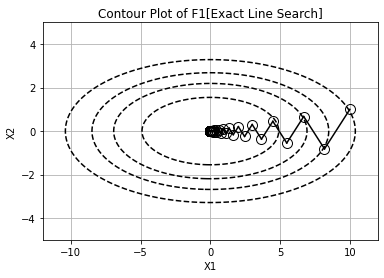

In [148]:
x1 = np.linspace(-12, 12, 2000)
x2 = np.linspace(-5, 5, 2000)

X1, X2 = np.meshgrid(x1, x2)

def f1_plot(x1, x2, gamma = 10):
    return 0.5 * ((x1 ** 2) + (gamma * (x2 ** 2)))

F = f1_plot(X1, X2)

for point in f1_exact_line_search_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')

for i in range(len(f1_exact_line_search_iterates)-1):
    plt.plot([f1_exact_line_search_iterates[i][0, 0], f1_exact_line_search_iterates[i+1][0, 0]], [f1_exact_line_search_iterates[i][1, 0], f1_exact_line_search_iterates[i+1][1, 0]], color='black', linestyle='-')

plt.contour(X1, X2, F, levels = [12, 24, 36, 54], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')

plt.title('Contour Plot of F1[Exact Line Search]')
plt.grid(True)
plt.show()

In [149]:
f1_backtracking_iterates, f1_backtracking_function_values = backtracking_line_search_gradient_descent(f1, f1_gradient, f1_backtracking_algorithm, x0, 1000, 1e-6)

Initial Function Value: 55.0
Updated Function Value: 39.69863382416671
Updated Function Value: 24.608612600415317
Updated Function Value: 16.672249240115917
Updated Function Value: 11.312375793170483
Updated Function Value: 7.687727768733109
Updated Function Value: 5.23308749253062
Updated Function Value: 3.2640974666722853
Updated Function Value: 2.2088219972481666
Updated Function Value: 1.4968712634079924
Updated Function Value: 1.015936632038545
Updated Function Value: 0.6906199216244064
Updated Function Value: 0.4702545631643843
Updated Function Value: 0.29291777328576446
Updated Function Value: 0.198269154958112
Updated Function Value: 0.13439918399326506
Updated Function Value: 0.09124359805700613
Updated Function Value: 0.06204463457361944
Updated Function Value: 0.03888046782079175
Updated Function Value: 0.026287439958445277
Updated Function Value: 0.017797976832533695
Updated Function Value: 0.012067878584126838
Updated Function Value: 0.008195234082626412
Updated Function V

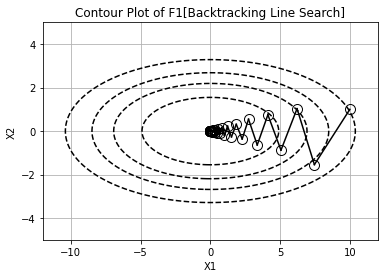

In [150]:
x1 = np.linspace(-12, 12, 2000)
x2 = np.linspace(-5, 5, 2000)

X1, X2 = np.meshgrid(x1, x2)

def f1_plot(x1, x2, gamma = 10):
    return 0.5 * ((x1 ** 2) + (gamma * (x2 ** 2)))

F = f1_plot(X1, X2)

for point in f1_backtracking_iterates:
    plt.plot(point[0, 0], point[1, 0], 'o', markersize=10, color='black', markerfacecolor='none')

for i in range(len(f1_backtracking_iterates)-1):
    plt.plot([f1_backtracking_iterates[i][0, 0], f1_backtracking_iterates[i+1][0, 0]], [f1_backtracking_iterates[i][1, 0], f1_backtracking_iterates[i+1][1, 0]], color='black', linestyle='-')

plt.contour(X1, X2, F, levels = [12, 24, 36, 54], colors='black', linestyles='dashed')
plt.xlabel('X1')
plt.ylabel('X2')

plt.title('Contour Plot of F1[Backtracking Line Search]')
plt.grid(True)
plt.show()

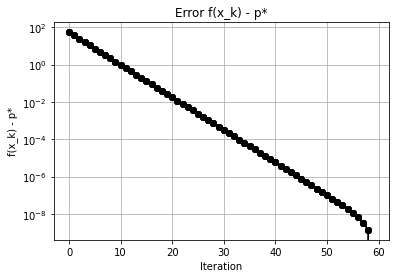

In [159]:
f1_exact_line_search_distance_from_optimal = f1_exact_line_search_function_values - f1_exact_line_search_function_values[-1]
f1_backtracking_distance_from_optimal = f1_exact_line_search_function_values - f1_exact_line_search_function_values[-1]

plt.plot(f1_exact_line_search_distance_from_optimal, marker='o', color='black', linestyle='-')
plt.plot(f1_backtracking_distance_from_optimal, marker='o', color='black', linestyle='-')

plt.scatter(range(len(f1_exact_line_search_distance_from_optimal)), f1_exact_line_search_distance_from_optimal, color='black')
plt.scatter(range(len(f1_backtracking_distance_from_optimal)), f1_backtracking_distance_from_optimal, color='black')

plt.xlabel('Iteration')
plt.ylabel('f(x_k) - p*')
plt.yscale('log')

plt.title('Error f(x_k) - p*')

plt.grid(True)
plt.show()


## Non-Quadratic Function

$f_2(x_1, x_2) = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} + e^{-x_1 - 0.1}$


$\frac{\partial{f_2}}{\partial{x_1}} = e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1}$

$\frac{\partial{f_2}}{\partial{x_2}} = 3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}$

$\nabla f_2(x) = 
\begin{pmatrix}
e^{x_1 + 3x_2 - 0.1} + e^{x_1 - 3x_2 - 0.1} - e^{-x_1 - 0.1} \\
3e^{x_1 + 3x_2 - 0.1} - 3e^{x_1 - 3x_2 - 0.1}
\end{pmatrix}
$


Exact Line Search: 

$f_2(x_1 + \alpha \Delta x_1, x_2 + \alpha \Delta x_2) = e^{x_1 + \alpha \Delta x_1 +  3x_2 + 3\alpha \Delta x_2 - 0.1} + e^{x_1 + \alpha \Delta x_1 - 3x_2 - 3\alpha \Delta x_2 - 0.1} + e^{-x_1 - \alpha \Delta x_1 - 0.1}$

$\frac{d}{d \alpha} f_2(x_1 + \alpha \Delta x_1, x_2 + \alpha \Delta x_2) = (\Delta x_1 + 3\Delta x_2) e^{x_1 + \alpha \Delta x_1 +  3x_2 + 3\alpha \Delta x_2 - 0.1} + (\Delta x_1 - 3\Delta x_2) e^{x_1 + \alpha \Delta x_1 - 3x_2 - 3\alpha \Delta x_2 - 0.1} + (-\Delta x_1) e^{-x_1 - \alpha \Delta x_1 - 0.1}$


In [152]:
def f2(x: np.ndarray):
    x1 = x[0, 0]
    x2 = x[1, 0]
    
    A = np.exp(x1 + (3 * x2) - 0.1)
    B = np.exp(x1 - (3 * x2) - 0.1)
    C = np.exp((-1 * x1) - 0.1)
    
    return A + B + C

def f2_gradient(x: np.ndarray):
    x1 = x[0, 0]
    x2 = x[1, 0]
    
    A = x1 + (3 * x2) - 0.1
    B = x1 - (3 * x2) - 0.1
    C = (-1 * x1) - 0.1
    
    gradient_vector = np.zeros(shape = x.shape)
    gradient_vector[0, 0] = np.exp(A) + np.exp(B) - np.exp(C)
    gradient_vector[1, 0] = (3 * np.exp(A)) - (3 * np.exp(B))
    
    return gradient_vector

def f2_exact_line_search(x: np.ndarray, delta_x: np.ndarray):
    grid_search_alphas = np.arange(start = 0, stop = 1, step = 0.0003)
    
    best_alpha = None
    best_function_value = np.inf
    
    for alpha in grid_search_alphas:
        if f2(x + (alpha * delta_x)) < best_function_value:
            best_alpha = alpha
            best_function_value = f2(x + (alpha * delta_x))

    return best_alpha
    

def f2_backtracking_algorithm(x: np.ndarray, delta_x: np.ndarray, alpha = 0.25, beta = 0.9, gamma = 10):
    t = 1
    while (f2(x + (t * delta_x))) > (f2(x) + (alpha * t * (f2_gradient(x).T @ delta_x))):
        t = beta * t
    
    return t

In [153]:
x0 = np.array([[1], [0.1]])

In [154]:
vanilla_gradient_descent(f2, f2_gradient, x0, 0.01, 1000, 1e-4)

Initial Function Value: 5.475106806825136
Updated Function Value: 5.101597310867808
Updated Function Value: 4.8716003537814
Updated Function Value: 4.691611222980238
Updated Function Value: 4.536531460966296
Updated Function Value: 4.397960990818273
Updated Function Value: 4.272302752051375
Updated Function Value: 4.1575515046231795
Updated Function Value: 4.052329371152242
Updated Function Value: 3.9555644102753478
Updated Function Value: 3.8663688669650798
Updated Function Value: 3.7839847860122164
Updated Function Value: 3.7077547294563997
Updated Function Value: 3.6371031295023304
Updated Function Value: 3.571522906300634
Updated Function Value: 3.5105651432461777
Updated Function Value: 3.453830789606524
Updated Function Value: 3.400963836312415
Updated Function Value: 3.351645624298239
Updated Function Value: 3.305590053009481
Updated Function Value: 3.2625395188670745
Updated Function Value: 3.2222614533240987
Updated Function Value: 3.184545357878295
Updated Function Value: 3.1

(array([[[ 1.00000000e+00],
         [ 1.00000000e-01]],
 
        [[ 9.51906354e-01],
         [ 5.50600563e-02]],
 
        [[ 9.07875806e-01],
         [ 3.17222243e-02]],
 
        [[ 8.66459672e-01],
         [ 1.88945629e-02]],
 
        [[ 8.27152110e-01],
         [ 1.15711908e-02]],
 
        [[ 7.89700374e-01],
         [ 7.26060860e-03]],
 
        [[ 7.53936341e-01],
         [ 4.65557734e-03]],
 
        [[ 7.19728029e-01],
         [ 3.04396303e-03]],
 
        [[ 6.86963543e-01],
         [ 2.02569437e-03]],
 
        [[ 6.55544749e-01],
         [ 1.36990537e-03]],
 
        [[ 6.25384197e-01],
         [ 9.40137134e-04]],
 
        [[ 5.96403279e-01],
         [ 6.53959463e-04]],
 
        [[ 5.68530923e-01],
         [ 4.60580682e-04]],
 
        [[ 5.41702594e-01],
         [ 3.28128610e-04]],
 
        [[ 5.15859471e-01],
         [ 2.36264542e-04]],
 
        [[ 4.90947770e-01],
         [ 1.71806581e-04]],
 
        [[ 4.66918162e-01],
         [ 1.26087365e-04]],

In [155]:
exact_line_search_gradient_descent(f2, f2_gradient, f2_exact_line_search, x0, 2000, 1e-6)

Initial Function Value: 5.475106806825136
Updated Function Value: 4.561732236284293
Updated Function Value: 3.8769414088327934
Updated Function Value: 3.39036563828385
Updated Function Value: 3.053149423193811
Updated Function Value: 2.8367498075649387
Updated Function Value: 2.7048807623976825
Updated Function Value: 2.631520107764044
Updated Function Value: 2.5931080990350655
Updated Function Value: 2.5744927015404597
Updated Function Value: 2.565878046036902
Updated Function Value: 2.562074349784792
Updated Function Value: 2.560438042903945
Updated Function Value: 2.559750342214085
Updated Function Value: 2.559464845438691
Updated Function Value: 2.5593475220571253
Updated Function Value: 2.559299557765163
Updated Function Value: 2.55928003323407
Updated Function Value: 2.5592721016965183
Updated Function Value: 2.559268885175465
Updated Function Value: 2.5592675823107482
Updated Function Value: 2.5592670549222873


(array([[[ 1.00000000e+00],
         [ 1.00000000e-01]],
 
        [[ 7.74921735e-01],
         [-1.10318936e-01]],
 
        [[ 5.85915028e-01],
         [ 9.10278901e-02]],
 
        [[ 3.88767803e-01],
         [-9.42478151e-02]],
 
        [[ 2.30392124e-01],
         [ 7.37239661e-02]],
 
        [[ 7.86623387e-02],
         [-6.93993347e-02]],
 
        [[-3.41266714e-02],
         [ 4.99493831e-02]],
 
        [[-1.31015920e-01],
         [-4.19112078e-02]],
 
        [[-1.96850102e-01],
         [ 2.76113896e-02]],
 
        [[-2.48175918e-01],
         [-2.10879106e-02]],
 
        [[-2.80695930e-01],
         [ 1.31017681e-02]],
 
        [[-3.04481601e-01],
         [-9.48313468e-03]],
 
        [[-3.18906706e-01],
         [ 5.69166978e-03]],
 
        [[-3.29131822e-01],
         [-4.01269080e-03]],
 
        [[-3.35211275e-01],
         [ 2.37830548e-03]],
 
        [[-3.39447182e-01],
         [-1.65254756e-03]],
 
        [[-3.41949856e-01],
         [ 9.75397129e-04]],

In [156]:
backtracking_line_search_gradient_descent(f2, f2_gradient, f2_backtracking_algorithm, x0, 2000, 1e-6)

Initial Function Value: 5.475106806825136
Updated Function Value: 4.663560653342793
Updated Function Value: 3.823022177774045
Updated Function Value: 3.3521741537492624
Updated Function Value: 2.9992639633932403
Updated Function Value: 2.802330276180138
Updated Function Value: 2.6833424847136804
Updated Function Value: 2.620571133844293
Updated Function Value: 2.584916026820781
Updated Function Value: 2.5709711999103826
Updated Function Value: 2.564199181048929
Updated Function Value: 2.5612341700735533
Updated Function Value: 2.5600288705760965
Updated Function Value: 2.559624292425108
Updated Function Value: 2.559398300369684
Updated Function Value: 2.55931564138171
Updated Function Value: 2.5592887584892434
Updated Function Value: 2.5592747868831958
Updated Function Value: 2.5592703376602253
Updated Function Value: 2.5592680234408314
Updated Function Value: 2.559267293661053


(array([[[ 1.00000000e+00],
         [ 1.00000000e-01]],
 
        [[ 6.89263012e-01],
         [-1.90360656e-01]],
 
        [[ 4.92735412e-01],
         [ 1.50760462e-01]],
 
        [[ 2.97654093e-01],
         [-1.47703767e-01]],
 
        [[ 1.37452337e-01],
         [ 1.19255270e-01]],
 
        [[-2.58159324e-03],
         [-1.04914018e-01]],
 
        [[-1.10685099e-01],
         [ 8.46670480e-02]],
 
        [[-1.91151545e-01],
         [-6.70371504e-02]],
 
        [[-2.43393171e-01],
         [ 4.33494500e-02]],
 
        [[-2.80750843e-01],
         [-3.16319423e-02]],
 
        [[-3.04355349e-01],
         [ 2.10060938e-02]],
 
        [[-3.19313491e-01],
         [-1.31056250e-02]],
 
        [[-3.28876307e-01],
         [ 7.85210640e-03]],
 
        [[-3.35729001e-01],
         [-5.96462776e-03]],
 
        [[-3.39506231e-01],
         [ 3.41643422e-03]],
 
        [[-3.41958715e-01],
         [-1.93642375e-03]],
 
        [[-3.43734700e-01],
         [ 1.42637043e-03]],